Python implementation of k-means clustering in 2D

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
import math as m

In [190]:
def make_data(no_points):
    
    x_points = []
    y_points = []
    
    for point in range(no_points):
        x_pos, y_pos = r.randrange(100)/10, r.randrange(100)/10
        x_points.append(x_pos)
        y_points.append(y_pos)
    
    return x_points, y_points

def init_k(k):
    
    x_k_init = []
    y_k_init = []
    
    for i in range(k):
        x_k_position, y_k_position = r.randrange(100)/10, r.randrange(100)/10
        x_k_init.append(x_k_position)
        y_k_init.append(y_k_position)
        
    return x_k_init, y_k_init

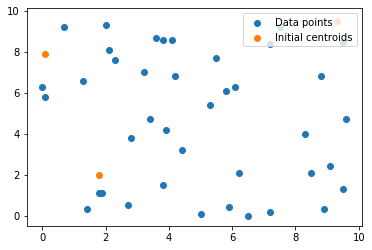

In [191]:
k=3
x_points, y_points = make_data(40)
x_k_init, y_k_init = init_k(k)

plt.scatter(x_points, y_points, label='Data points')
plt.scatter(x_k_init, y_k_init, label='Initial centroids')
plt.legend(loc='upper right')
plt.show()

In [192]:
def distance_calc(x_points, y_points, x_k_init, y_k_init):

    distances = []
    for i, n in enumerate(x_points):
        k_dists = []
        for j, n in enumerate(x_k_init):
            k_dist = np.sqrt(((x_k_init[j]-x_points[i])**2) + ((y_k_init[j]-y_points[i])**2))
            k_dists.append(k_dist)
        distances.append(k_dists)
    distances = np.array(distances)
    
    return(distances)

In [193]:
distances = distance_calc(x_points, y_points, x_k_init, y_k_init)
def k_allocation(distanes):
    
    which_k = []
    for i in distances:
        which_k.append(np.argmin(i))
    
    return(which_k)

which_k = k_allocation(distances)

In [194]:
cluster_a = []
cluster_b = []
cluster_c = []

for a, b in enumerate(x_points):
    if which_k[a] == 0:
        cluster_a.append([x_points[a], y_points[a]])
    elif which_k[a] == 1:
        cluster_b.append([x_points[a], y_points[a]])
    elif which_k[a] == 2:
        cluster_c.append([x_points[a], y_points[a]])
    
cluster_a = np.array(cluster_a)
cluster_b = np.array(cluster_b)
cluster_c = np.array(cluster_c)   


<function matplotlib.pyplot.show(*args, **kw)>

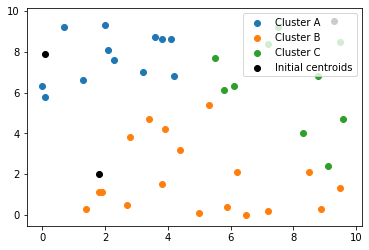

In [195]:
plt.scatter(cluster_a[:,0],cluster_a[:,1], label='Cluster A')
plt.scatter(cluster_b[:,0],cluster_b[:,1], label='Cluster B')
plt.scatter(cluster_c[:,0],cluster_c[:,1], label='Cluster C')
plt.scatter(x_k_init, y_k_init, c = 'k', label='Initial centroids')
plt.legend(loc='upper right')
plt.show